<a href="https://www.kaggle.com/oladimejialabi/oladimeji-kaggle-titanic-one?scriptVersionId=83050793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Titanic Data**

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# **Features' Selection and Engineering**

In [3]:
# Features Selection
features = ['Pclass','Sex','SibSp','Parch','Fare','Age']

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit_transform(features[4,5])
# x_test = sc.fit_transform()

x = pd.get_dummies(train_data[features])
x_test = pd.get_dummies(test_data[features])
y = train_data["Survived"]


In [4]:
# handlin NaN in Fare and Age
x['Fare'].fillna(x['Fare'].mode()[0], inplace=True)
x_test['Fare'].fillna(x_test['Fare'].mode()[0], inplace=True)

# Handling NaN in Age
x['Age'].fillna(x['Age'].mode()[0], inplace=True)
x_test['Age'].fillna(x_test['Age'].mode()[0], inplace=True)


In [5]:
# Algorithm Tuning
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(x,y)
print(rsearch)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f445ce14290>})


# Ensemble Model

(array([292.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 126.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

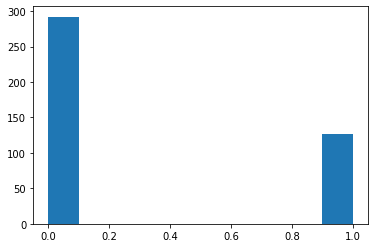

In [6]:
# the Model)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',n_jobs=-1, random_state=42)
rfc.fit(x,y)
y_pred = rfc.predict(x_test)
y_pred
plt.hist(y_pred)
# The accuracy score as shown by from kaggle report is 0.77511

# Logistic Regression Model

In [7]:
# # plotting a contour map with logreg using the Visualising the Training set results
# from matplotlib.colors import ListedColormap
# X_set, y_set = x, y
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step =
# 0.01),
# np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
# alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
# c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Pclass and Parch')
# plt.ylabel('Survived')
# plt.legend()


In [8]:
# to save the output: i.e the prediction
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [9]:
# women = train_data.loc[train_data.Sex == 'female']["Survived"]
# rate_women = sum(women)/len(women)

# print("% of women who survived:", rate_women)